# Directional Derivative & Partial Derivative
Inspecting derivatives near $P_0(0,0)$ of this following function:
$$
    f(x)=\sqrt{x^2+y^2}
$$
According to differentiable conditions, we got
$$
    \frac{\partial{f{(P_0)}}}{\partial(\vec l)} = \mathop{\lim}\limits_{\rho \to 0} {\frac{\sqrt{x^2+y^2}-0}{\sqrt{{(x-0)}^2+{(y-0)}^2}}}=1
$$
Where $\rho$ stands for reminder of first derivatives. <br>
And $\vec l$ is any direction vector that approaches point $P_0(0,0)$ <br>
from this derivation we know that directional derivatives near $P_0(0,0)$ exists in either direction, whilst
$$
\left\{
\begin{array}{ll}
\mathop{\lim}\limits_{x \to 0} \frac{\sqrt{x^2}-0}{x} \\
\mathop{\lim}\limits_{y \to 0} \frac{\sqrt{y^2}-0}{x}
\end{array}
\right .
$$
both not exists, then we could conclude that $f(x)$ is not differentialbe near point $P_0(0,0)$.

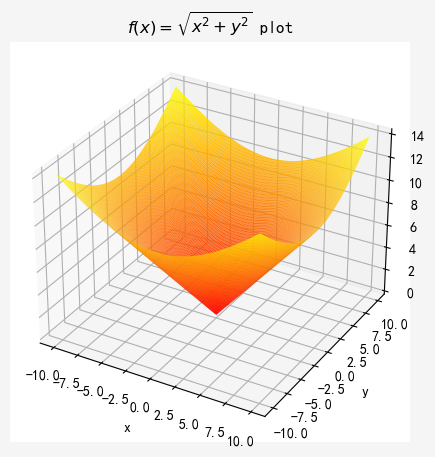

In [20]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mlp
import numpy as np
import math
import warnings

%matplotlib inline
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
warnings.filterwarnings("ignore")

x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
xx, yy = np.meshgrid(x,y)

zz = np.zeros_like(xx)
for idx, vx in enumerate(x):
    for idy, vy in enumerate(y):
        zz[idx,idy] = math.sqrt(math.pow(vx,2) + math.pow(vy,2))

fig = plt.figure(figsize=(4,6),facecolor="whitesmoke", edgecolor="gray")
ax = Axes3D(fig)
ax.plot_surface(xx,yy,zz,
                rstride=1,  # rstride（row）
                cstride=1,  # cstride(column)
                cmap=plt.cm.autumn) 
ax.grid(alpha=0.45)
ax.set_title("$f(x) = \sqrt{x^2+y^2}$ plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

# Linear First-Order Differential Equation
## Closed-form Equation
$$
    \frac{dy}{dx} + P(x)y = Q(x)
$$

## Numerical Solution
$$
    \frac{dy}{dx} = f(x,y(x))
$$
transfer equation above into difference equation
$$
    y_{n+1} = y_n + hf(x_n,y(x_n))
$$

## Closed-Form
python sympy package
<hr>
dependence variable - <font color=red><b>sym.Function("alias")</b></font> <br>
independence variable - <font color=red><b>sym.symbols("alias",positive, negative, real, odd, even)</b> </font> <br>
derivative function = <font color=red><b>sym.Eq(left,right)</b></font> <br>
solve handle = <font color=red><b>sym.dsolve(eq)</b></font> <br>
<hr>
sym derivative: <br>
    > <font color=red><b>sym.y(x).diff(x,2)</b></font> where y is a sym.Function instance, x is a sym.symbols instance <br>
sym.intergration: <br>
    > <font color=red><b>sym.integrate(a,b,x) </b></font> <br>
sym print <br>
    > <font color=red><b>sym.pprint(res) </b></font> <br>
    > <font color=red><b>sym.latex(res) </b></font> <br>

$$
    cos(y)\frac{dy}{dx} - sin(y) = cos(x){sin}^2(y)
$$

In [34]:
import sympy as sym
import numpy as np
import math
import warnings

warnings.filterwarnings("ignore")
x = sym.symbols("x")
y = sym.Function("y")
ode = sym.Eq(sym.cos(y(x))*y(x).diff(x,1) - sym.sin(y(x)) - sym.cos(x) * sym.sin(y(x))**2,0)
res = sym.dsolve(ode)
# print(sym.latex(res))
sym.pprint(res)

⎡           ⎛            x        ⎞                 ⎛            x        ⎞⎤
⎢           ⎜         2⋅ℯ         ⎟                 ⎜         2⋅ℯ         ⎟⎥
⎢y(x) = asin⎜─────────────────────⎟ + π, y(x) = asin⎜─────────────────────⎟⎥
⎢           ⎜         x    ⎛    π⎞⎟                 ⎜         x    ⎛    π⎞⎟⎥
⎢           ⎜C₁ + √2⋅ℯ ⋅sin⎜x + ─⎟⎟                 ⎜C₁ - √2⋅ℯ ⋅sin⎜x + ─⎟⎟⎥
⎣           ⎝              ⎝    4⎠⎠                 ⎝              ⎝    4⎠⎠⎦


$$
    \left[ y{\left(x \right)} = \operatorname{asin}{\left(\frac{2 e^{x}}{C_{1} + \sqrt{2} e^{x} \sin{\left(x + \frac{\pi}{4} \right)}} \right)} + \pi, \  y{\left(x \right)} = \operatorname{asin}{\left(\frac{2 e^{x}}{C_{1} - \sqrt{2} e^{x} \sin{\left(x + \frac{\pi}{4} \right)}} \right)}\right]
$$

### initial value and bounding value
1. importing initial or bounding values:
   > <font color=maroon><b>{y(value):value}</b></font> <br>
2. solve problem
   > <font color=maroon><b>sym.dsolve(sym.Eq,ics)</b></font> <br>

practice this:
$$
\left\{
\begin{array}{ll}
\frac{dy}{dx} + sinx\space y & = & 3cosxsinx \\
y(0) = 3
\end{array}
\right .
$$

In [35]:
import sympy as sym
import numpy as np
import math
import warnings

warnings.filterwarnings("ignore")
x = sym.symbols("x")
y = sym.Function("y")
ode = sym.Eq(y(x).diff(x,1)+sym.sin(x)*y(x) - sym.cos(x)* sym.sin(x),0)
con = {y(0):3}
res = sym.dsolve(ode,ics=con)
# print(sym.latex(res))
sym.pprint(res)

        -1  cos(x)             
y(x) = ℯ  ⋅ℯ       + cos(x) + 1


$$
y{\left(x \right)} = \frac{e^{\cos{\left(x \right)}}}{e} + \cos{\left(x \right)} + 1
$$

practice this:
$$
\left\{
\begin{array}{ll}
f^{\prime\prime}(x) - 2f^{\prime}(x) + 3f(x) = 4  \\
f(0) = 16 \\
f^{\prime}(0) = 18 \\
\end{array}
\right .
$$

In [46]:
import sympy as smy
import numpy as np 
import warnings

warnings.filterwarnings("ignore")
x = sym.symbols("x")
f = sym.Function("f")
ode = sym.Eq(f(x).diff(x,2)-2*f(x).diff(x,1)+3*f(x),0)
con = {f(0):16,f(x).diff(x,1).subs(x,0):18}
res = sym.dsolve(ode,ics=con)
# lres = sym.latex(res)
# print(lres)
sym.pprint(res)

                                      x
f(x) = (√2⋅sin(√2⋅x) + 16⋅cos(√2⋅x))⋅ℯ 


$$
    f{\left(x \right)} = \left(\sqrt{2} \sin{\left(\sqrt{2} x \right)} + 16 \cos{\left(\sqrt{2} x \right)}\right) e^{x}
$$

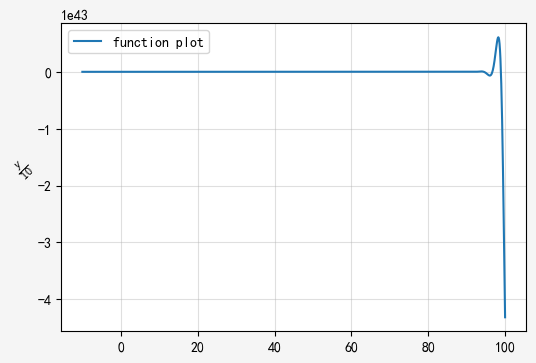

In [58]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
resx = np.linspace(-10,100,1000)
cp = np.sqrt(2)
resy = (cp*np.sin(cp*resx) + 16*np.cos(cp*resx))*np.exp(resx)
fig,ax = plt.subplots(1,1,figsize=(6,4),
                     facecolor="whitesmoke",
                     edgecolor="gray")
ax.plot(resx,resy/10,label="function plot", lw=1.5, ls="-")
ax.set_ylabel(r"$\frac{y}{10}$",rotation=45)
ax.grid(alpha=0.4)
ax.legend(loc="best")

### Equation Set
1. eq = [sym.Eq, sym.Eq, ...]
1. sym.dsolve(eq, ics={}) <br>

practice this:
$$
\left\{
\begin{array}{ll}
\frac{dy}{dx} = z + 2e^{x} \\
\frac{dz}{dx} = y + e^{x} \\
y(0) = 2 \\
z(0) = 4 \\
\end{array}
\right .
$$

In [71]:
import sympy as sym
import numpy as np
import math
import warnings

warnings.filterwarnings("ignore")
x = sym.symbols("x")
y,z = sym.symbols("y,z", cls=sym.Function)
ode = [sym.Eq(y(x).diff(x,1),z(x)+2*sym.exp(x)), sym.Eq(z(x).diff(x,1),y(x)+sym.exp(x))]
con = {y(0):2, z(0):4}
res = sym.dsolve(ode,ics=con)

In [73]:
sym.pprint(res)
#print(sym.latex(res))

⎡            x       x      -x              x       x      -x⎤
⎢       3⋅x⋅ℯ    13⋅ℯ    5⋅ℯ           3⋅x⋅ℯ    11⋅ℯ    5⋅ℯ  ⎥
⎢y(x) = ────── + ───── - ─────, z(x) = ────── + ───── + ─────⎥
⎣         2        4       4             2        4       4  ⎦


$$
\left[ y{\left(x \right)} = \frac{3 x e^{x}}{2} + \frac{13 e^{x}}{4} - \frac{5 e^{- x}}{4}, \  z{\left(x \right)} = \frac{3 x e^{x}}{2} + \frac{11 e^{x}}{4} + \frac{5 e^{- x}}{4}\right]
$$

## numerical solution
1. <font color=maroon><b>scipy.integrate</b></font> package
2. most commonly used one for initial value problem: <font color=maroon><b>solve_ivp</b></font>
3. most commonly used one for boundary value problem: <font color=maroon><b>solve_bvp</b></font> <br>
for first-order ODE, which is:

$$
    \frac{d\vec y}{dt} = f(t,\vec y), \vec y(t_0) = \vec y_o
$$
parameters are:<br>
> f: function <br>
> scale: (t0,t1) <br>
> initial value [y_0] <br>
> method: <font color=maroon><b>RK23 RK45</b></font> <br>
> dense_output: default False, for plotting purposes <br>

$$
    \frac{dy}{dt} = sin(3t)\space y + cos(2t)
$$

In [76]:
import scipy.integrate
import numpy as np
import warnings

warnings.filterwarnings("ignore")
func = 
integrate.solve_ivp()

$$
\begin{eqnarray} y_0 - \alpha &=& 0 \ \frac{y_{i-1} - 2 y_i + y_{i+1}}{h^2} + (3 y_i) (\frac{y_{i+1} - y_{i-1}}{2 h}) &=& 0 \ y_L - \beta &=&0 \end{eqnarray}
$$

### ivp and bvp difference
1. difference function needs at least one initial value $y(0)$ to calculate following numerical values, this initial value problem could just use this initial value as a strating point
2. we could use one step R-K method or even Adams linearmulti-step methods.
3. but for boundary value problem, we needs more alter of function to suit boundary values.

### notice 
1. notice that solve_ivp and solve_bvp methods could only handle first-order derivative function, thus linear higher-order derivative function should convert to first-order for calculation.